## *Supp.Info #2*

This program is part of the Manuscript

# Automatic differential analysis of NMR experiments in complex samples

*
Laure Margueritte,
Petar Markov,
Lionel Chiron,
Jean-Philippe Starck,
Catherine Vonthron-Sénécheau,
Mélanie Bourjot,
and Marc-André Delsuc *

----

The files processed by the Plasmodesma program are here analyzed.

Two analysis are proposed

- the comparison of the bucket standard deviation between two experiments can be used to generate a spectral fingerprint
- the  comparison of the bucket area over the whole experiment series can also be used to generate a spectral fingerprint

### Set-up environment

In [1]:
# first load the python environment
from __future__ import print_function
%pylab inline
import os.path as op
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# All utilities for loading, cleaning, and displaying bucket lists is in BucketUtilities.py
import BucketUtilities
from BucketUtilities import affiche, loadStd2D, loadInt2D

In [3]:
# This is were all Plasmodesma output is located
direc = r"../DATA/ARTE_160816/"
results = op.join(direc, "Results")

### show report.csv

In [4]:
pd.read_csv( op.join(direc, 'report.csv'), skiprows=2, index_col=(0,1) )

date       PULPROG        SFO1  NS        TE     TD  \
manip        expno                                                              
ARTE1_160816 1      2016-08-20            zg  700.163291  64  294.9623  16384   
             10     2016-08-20      cosydfph  700.163291   8  294.9623   4096   
             2      2016-08-20            zg  700.163291  64  294.9623  16384   
             20     2016-08-20    dipsi2phpr  700.163291   8  294.9623   4096   
             30     2016-08-20    dstebpgp3s  700.163291  32  294.9623   4096   
             40     2016-08-20      hsqcetgp  700.163292   4  294.9623   2048   
             50     2016-08-20  hmbcgplpndqf  700.163292  48  294.9623   4096   
ARTE2_160816 1      2016-08-18            zg  700.163291  64  294.9623  16384   
             10     2016-08-18      cosydfph  700.163291   8  294.9623   4096   
             2      2016-08-19            zg  700.163291  64  295.0593  16384   
             20     2016-08-18    dipsi2phpr  700.163291   8  295.0593   4096   
             3      2016-08-19            zg  700.163291  64  294.9623  16384   
             30     2016-08-18     ledbpgp2s  700.163291  32  295.0593   4096   
             40     2016-08-18      hsqcetgp  700.163292   4  294.9623   2048   
             50     2016-08-20  hmbcgplpndqf  700.163292  48  294.9623   4096   
ARTE3_160816 1      2016-08-19            zg  700.163291  64  294.9623  16384   
             10     2016-08-19      cosydfph  700.163291   8  294.9623   4096   
             2      2016-08-18            zg  700.163291  64  294.9623  16384   
             20     2016-08-19    dipsi2phpr  700.163291   8  294.9623   4096   
             3      2016-08-19            zg  700.163291  64  294.9623  16384   
             30     2016-08-19     ledbpgp2s  700.163291  32  294.9623   4096   
             40     2016-08-19      hsqcetgp  700.163292   4  294.9623   2048   
             50     2016-08-19  hmbcgplpndqf  700.163292  48  294.9623   4096   
ARTE4_160816 1      2016-08-19            zg  700.163291  64  295.0593  16384   
             10     2016-08-19      cosydfph  700.163291   8  294.9623   4096   
             2      2016-08-20            zg  700.163291  64  294.9623  16384   
             20     2016-08-19    dipsi2phpr  700.163291   8  294.9623   4096   
             30     2016-08-19    dstebpgp3s  700.163291  32  294.9623   4096   
             40     2016-08-19      hsqcetgp  700.163292   4  294.9623   2048   
             50     2016-08-19  hmbcgplpndqf  700.163292  48  294.9623   4096   
ARTE5_160816 1      2016-08-18            zg  700.163291  64  294.9623  16384   
             10     2016-08-17      cosydfph  700.163291   8  294.9623   4096   
             2      2016-08-18            zg  700.163291  64  295.0593  16384   
             20     2016-08-17    dipsi2phpr  700.163291   8  295.0593   4096   
             3      2016-08-19            zg  700.163291  64  294.9623  16384   
             30     2016-08-17     ledbpgp2s  700.163291  32  295.0593   4096   
             40     2016-08-17      hsqcetgp  700.163292   2  294.9623   2048   
             41     2016-08-18      hsqcetgp  700.163292   4  294.9623   2048   
             50     2016-08-17  hmbcgplpndqf  700.163292  48  294.9623   4096   
ARTEref      1      2016-11-26            zg  700.163291  64  294.9623  16384   
             10     2016-11-26      cosydfph  700.163291   8  294.9623   4096   
             2      2016-11-27            zg  700.163291  64  294.9623  16384   
             20     2016-11-27    dipsi2phpr  700.163291   8  294.9623   4096   
             30     2016-11-27    dstebpgp3s  700.163291  32  294.9623   4096   
             40     2016-11-27      hsqcetgp  700.163292   4  295.0593   2048   
             50     2016-11-27  hmbcgplpndqf  700.163292  16  294.9623   4096   

                      RG         SW      O1   D1     P1           SFO1.1 TD.1  \
manip        expno                                      

### report of the processing

In [5]:
pd.read_csv( op.join(direc, 'files.csv'), skiprows=1, index_col=(0,1) )

type                            file  \
manip         expno                                                 
ARTE1_160816 1                 1D                1_bucketlist.csv   
             1                 1D                  1_peaklist.csv   
             2                 1D                2_bucketlist.csv   
             2                 1D                  2_peaklist.csv   
             10          cosydfph      cosydfph_10_bucketlist.csv   
             10          cosydfph        cosydfph_10_peaklist.csv   
             20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
             20        dipsi2phpr      dipsi2phpr_20_peaklist.csv   
             30        dstebpgp3s    dstebpgp3s_30_bucketlist.csv   
             30        dstebpgp3s      dstebpgp3s_30_peaklist.csv   
             50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
             50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
             40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
             40          hsqcetgp        hsqcetgp_40_peaklist.csv   
ARTE2_160816 1                 1D                1_bucketlist.csv   
             1                 1D                  1_peaklist.csv   
             2                 1D                2_bucketlist.csv   
             2                 1D                  2_peaklist.csv   
             3                 1D                3_bucketlist.csv   
             3                 1D                  3_peaklist.csv   
             10          cosydfph      cosydfph_10_bucketlist.csv   
             10          cosydfph        cosydfph_10_peaklist.csv   
             20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
             20        dipsi2phpr      dipsi2phpr_20_peaklist.csv   
             50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
             50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
             40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
             40          hsqcetgp        hsqcetgp_40_peaklist.csv   
             30         ledbpgp2s     ledbpgp2s_30_bucketlist.csv   
             30         ledbpgp2s       ledbpgp2s_30_peaklist.csv   
...                           ...                             ...   
ARTE4_160816 50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
             50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
             40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
             40          hsqcetgp        hsqcetgp_40_peaklist.csv   
ARTE5_160816 1                 1D                1_bucketlist.csv   
             1                 1D                  1_peaklist.csv   
             2                 1D                2_bucketlist.csv   
             2                 1D                  2_peaklist.csv   
             3                 1D                3_bucketlist.csv   
             3                 1D                  3_peaklist.csv   
             10          cosydfph      cosydfph_10_bucketlist.csv   
             10          cosydfph        cosydfph_10_peaklist.csv   
             20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
             20        dipsi2phpr      dipsi2phpr_20_peaklist.csv   
             50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
             50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
             40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
             40          hsqcetgp        hsqcetgp_40_peaklist.csv   
             41          hsqcetgp      hsqcetgp_41_bucketlist.csv   
             41          hsqcetgp        hsqcetgp_41_peaklist.csv   
             30         ledbpgp2s     ledbpgp2s_30_bucketlist.csv   
             30         ledbpgp2s       ledbpgp2s_30_peaklist.csv   
ARTEref      1                 1D                1_bucketlist.csv   
             1                 1D                  1_peaklist.csv   
             2                 1D                2_bucketlist.csv   
             2             

Samples `ARTEn_160816` with `n` from 1 to 5,  correspond to the sample 1 to 5 in table 1:

| Sample n° |  1  |  2  |  3  |  4  |  5  |	
--------:|:---:|:---:|:---:|:---:|:---:|
| *S. muticum* extract | 10 mg | 10 mg | 10 mg | 10 mg | 10 mg |
| added artemisinin | 0 mg | 0.15 mg | 0.24 mg | 0.32 mg | 2 mg	    |

each preparation  was dissolved in 750 µl MeOD-D4 and put into a 5mm NMR tube.

`ARTEref` contains a preparation of pure artemisin, used for reference.

## Identification of active molecule

Identification is based on the comparison of the 2D bucket lists.
The best results are obtained with the standard deviation value of each buckets, using the COSY experiment.

### load standard deviation bucket
- `loadStd2D()` loads the data,
- `net=True` determines applying the $t_1$-noise cleaning operation, using `BucketUtilities.NETMODE` switch to determine the algorithm.
- `sym=True` applies the symmetrization.

In [6]:
# reference sample
BucketUtilities.NETMODE = 'mieux'  # this is the hard-thresholding algo
Im1 = loadStd2D(op.join(results, r"ARTE1_160816/2D/cosydfph_10_bucketlist.csv"), net=True, sym=True)

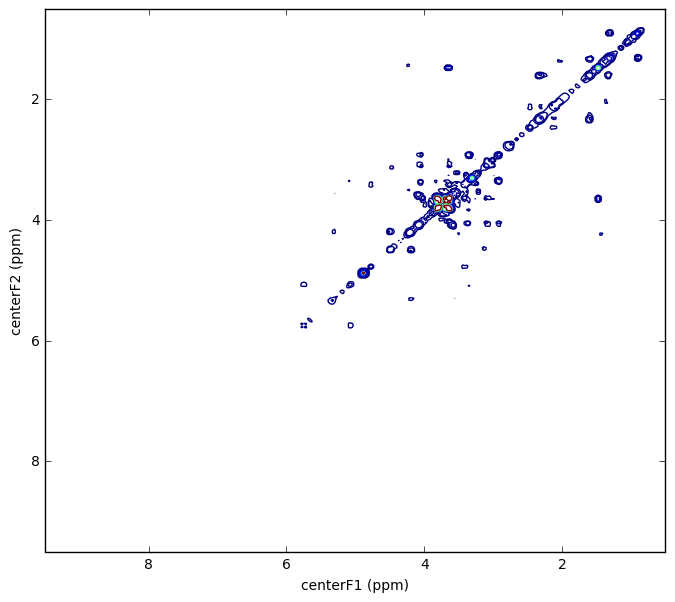

In [7]:
# then display
affiche(*Im1, scale=6)

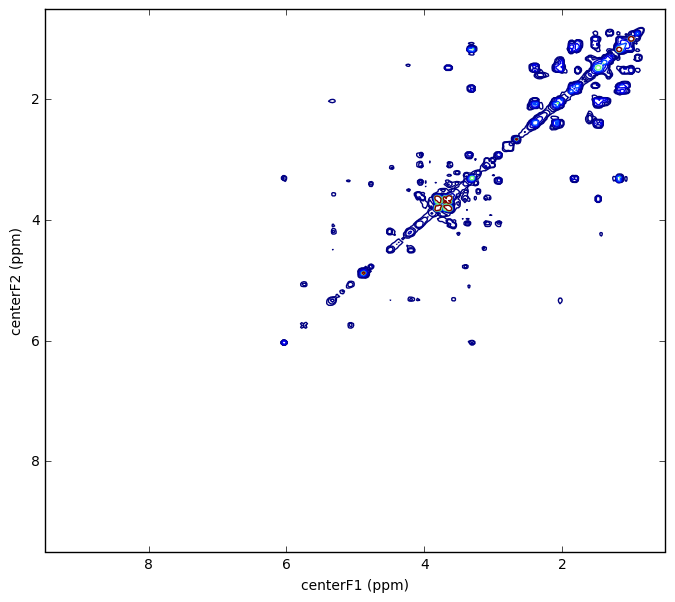

In [8]:
# load the highest concentration
Im2 = loadStd2D(op.join(results, r"ARTE5_160816/2D/cosydfph_10_bucketlist.csv"), net=True, sym=True)
affiche(*Im2, scale=6)

### Comparison by substraction

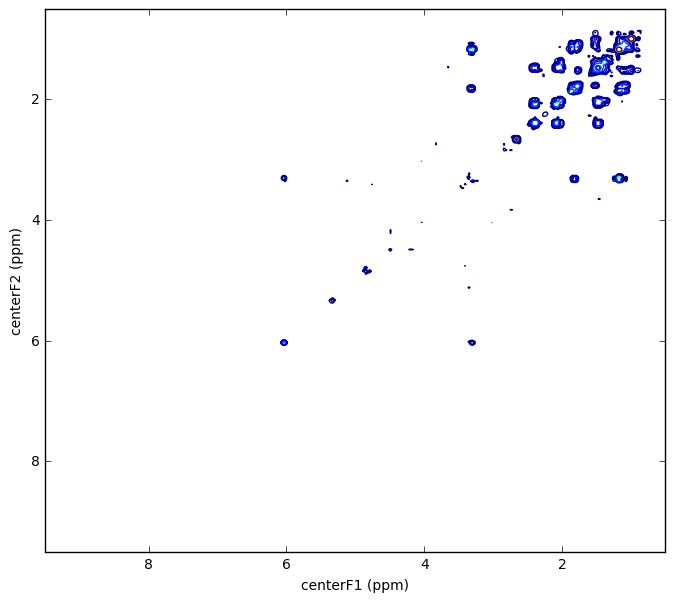

In [9]:
affiche(Im2[0], Im2[1], Im2[2]-Im1[2], scale=6)

### The Artemisinin reference
drawn from the standard deviation bucket list of the reference.


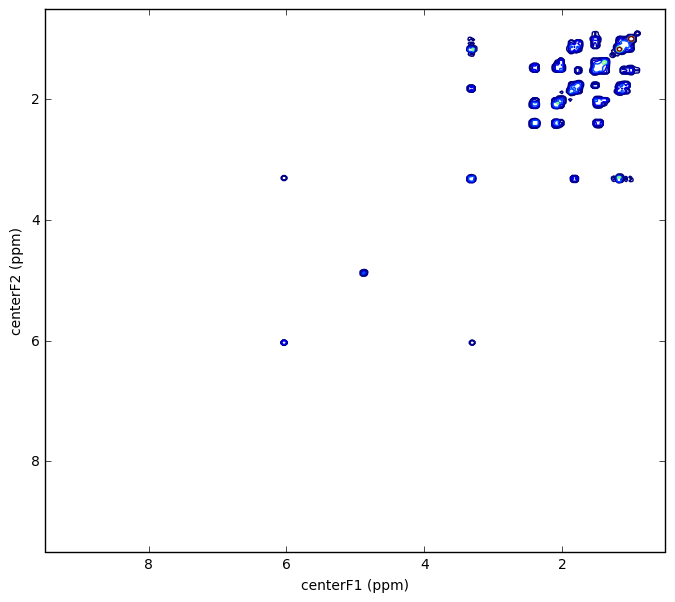

In [10]:
Ref = loadStd2D(op.join(results, r"ARTEref/2D/cosydfph_10_bucketlist.csv"), net=True, sym=True)
affiche(*Ref, scale=6)

### Comparison by ratio

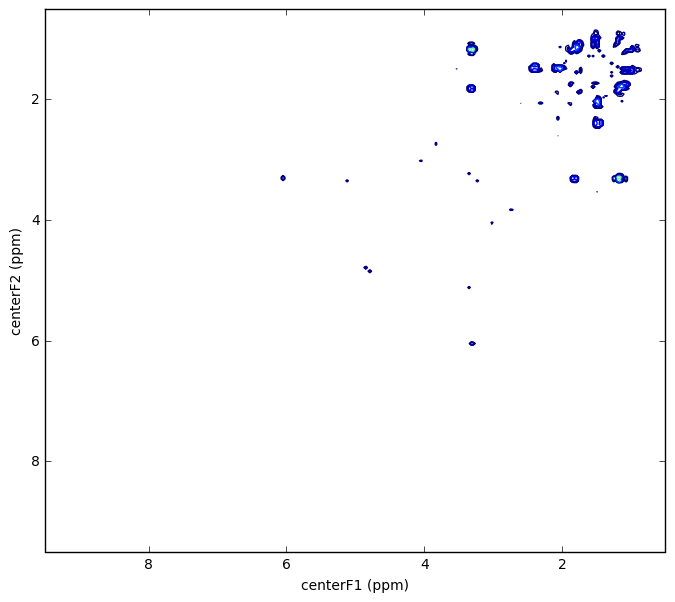

In [11]:
affiche(Im2[0], Im2[1], Im2[2]/Im1[2], scale=1)

### same procedure with lower concentrations

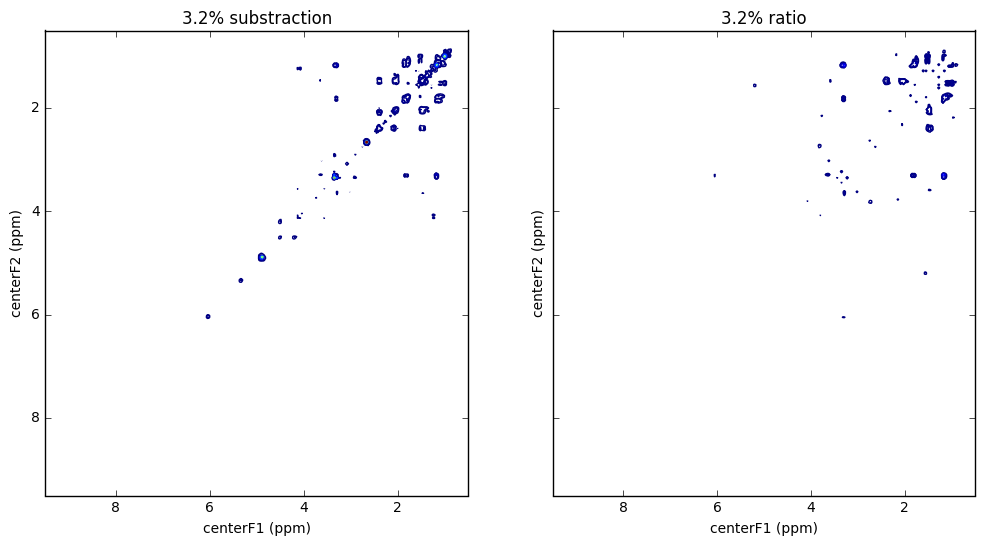

In [12]:
Im2 = loadStd2D(op.join(results, r"ARTE4_160816/2D/cosydfph_10_bucketlist.csv"), net=True, sym=True)
f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))
ax1.set_title('3.2% substraction')
affiche(Im2[0], Im2[1], Im2[2]-Im1[2], scale=3, ax=ax1)
ax2.set_title('3.2% ratio')
affiche(Im2[0], Im2[1], Im2[2]/Im1[2], scale=0.2, ax=ax2, reverse=False)

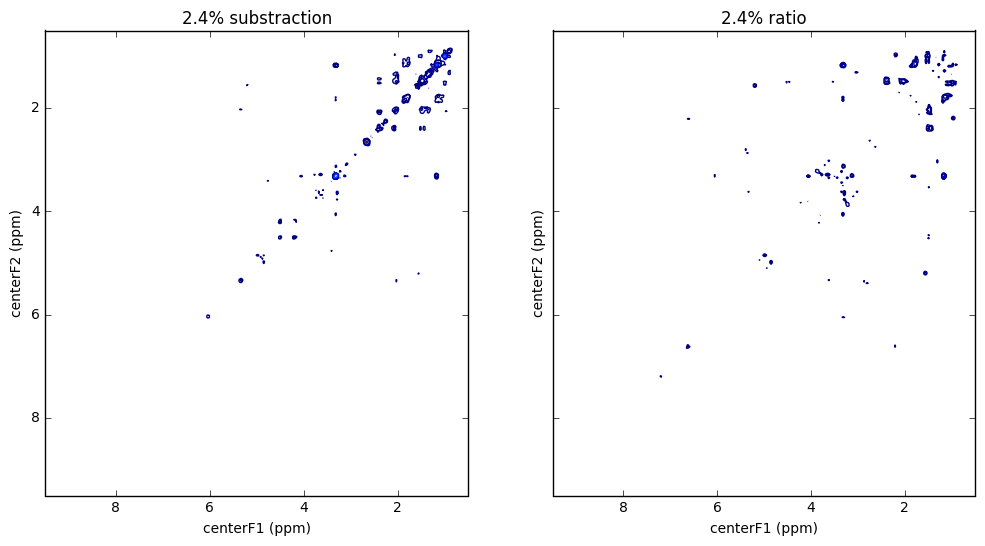

In [13]:
Im2 = loadStd2D(op.join(results, r"ARTE3_160816/2D/cosydfph_10_bucketlist.csv"), net=True, sym=True)
f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))
ax1.set_title('2.4% substraction')
affiche(Im2[0], Im2[1], Im2[2]-Im1[2], scale=4, ax=ax1)
ax2.set_title('2.4% ratio')
affiche(Im2[0], Im2[1], Im2[2]/Im1[2], scale=0.1, ax=ax2, reverse=False)

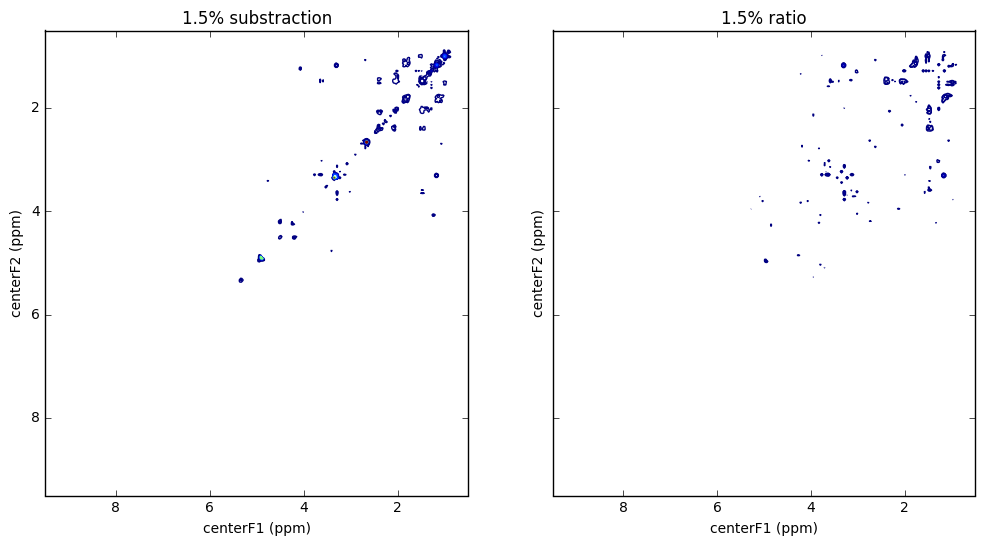

In [14]:
Im2 = loadStd2D(op.join(results, r"ARTE2_160816/2D/cosydfph_10_bucketlist.csv"), net=True, sym=True)
f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))
ax1.set_title('1.5% substraction')
affiche(Im2[0], Im2[1], Im2[2]-Im1[2], scale=4, ax=ax1)
ax2.set_title('1.5% ratio')
affiche(Im2[0], Im2[1], Im2[2]/Im1[2], scale=0.07, ax=ax2, reverse=False)

# Regression Analysis

Load the area of the 5 experiments in matrix X

In [15]:
X = []
for i in range(1,6):
    tit = op.join(results, r"ARTE{}_160816/2D/cosydfph_10_bucketlist.csv".format(i) )
    print (tit)
    Int = loadInt2D(tit, net=True, sym=True)
    tInt = Int[2].ravel() # [tmask]
    X.append(tInt)
X = np.array(X)
print ("X.shape", X.shape)

../DATA/ARTE_160816/Results/ARTE1_160816/2D/cosydfph_10_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE2_160816/2D/cosydfph_10_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE3_160816/2D/cosydfph_10_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE4_160816/2D/cosydfph_10_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE5_160816/2D/cosydfph_10_bucketlist.csv
X.shape (5, 90601)


Load concentrations

In [16]:
Y = np.array([0, 0.15, 0.24, 0.32, 2])/2   # divide by 2 to be in 0..1 range

compute a linear model using scikit-learn

In [17]:
import sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

keep only features over a given threshold, and display it

In [18]:
Threshold = 3E-14
coefmask = (reg.coef_)> Threshold
coef = reg.coef_[coefmask]
tcoefmask = np.where(coefmask.ravel()>0)[0]

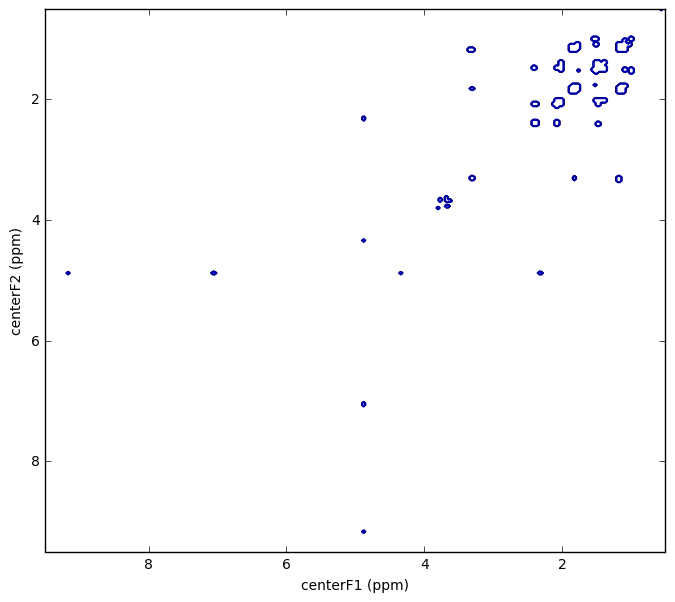

In [19]:
N = len(Im1[2].ravel())
m = np.zeros(N)
m[tcoefmask] = 1.0
m = m.reshape(Im2[2].shape)
affiche(Im1[0],Im1[1],m, scale=0.1)


# using Recursive Feature Elimination

We'll use the following paramters:

- n_features_to_select : int or None (default=None)
    The number of features to select. If `None`, half of the features
    are selected.
- step : int or float, optional (default=1)
If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration.


In [20]:
from sklearn.feature_selection import RFE
NFeatures = 300  # we want a small number
estimator = linear_model.LinearRegression()
selector = RFE(estimator, step=0.5, n_features_to_select=NFeatures)
selector = selector.fit(X, Y)

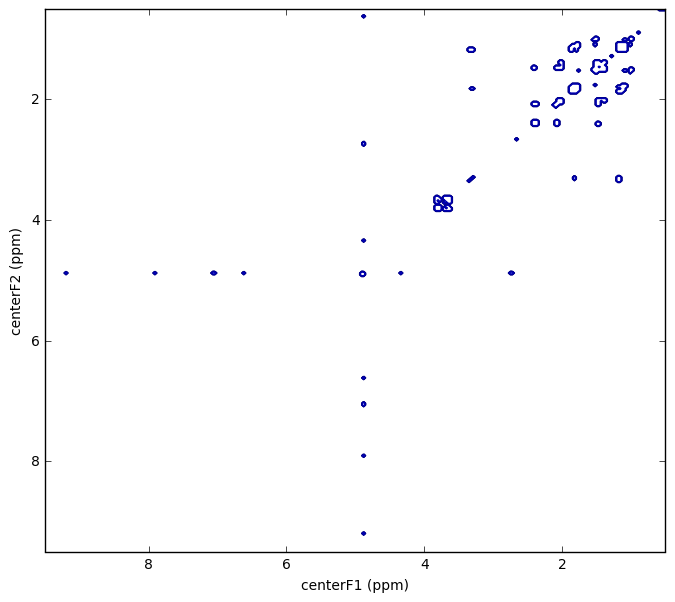

In [21]:
N = len(Im2[2].ravel())
m = np.zeros(N)
m[selector.support_] = 1.0
#m[coef] = 1.0
m = m.reshape(Im2[2].shape)
affiche(Im1[0],Im1[1],m, scale=0.1)

### The same can be done without the highest concentration, to check the robustness of the approach

In [22]:
Y[:4]

array([ 0.   ,  0.075,  0.12 ,  0.16 ])

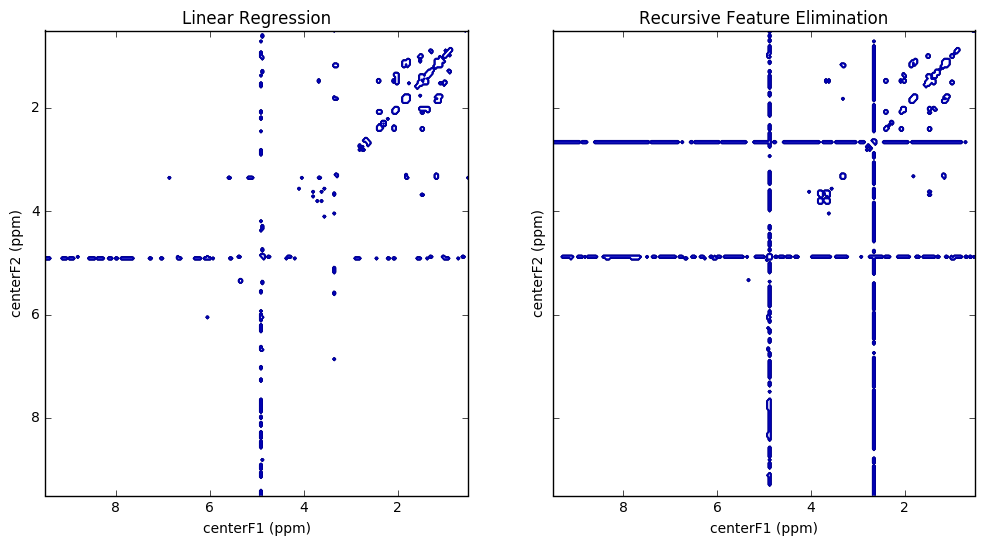

In [23]:
# First Regression
reg.fit(X[:4],Y[:4])
Threshold = 0.5E-14
coefmask = (reg.coef_)> Threshold
coef = reg.coef_[coefmask]
tcoefmask = np.where(coefmask.ravel()>0)[0]
m = np.zeros(N)
m[tcoefmask] = 1.0
m = m.reshape(Im2[2].shape)

# then RFE
NFeatures = 1200  # we want a small number
selector = RFE(estimator, step=0.5, n_features_to_select=NFeatures)
selector = selector.fit(X[:4], Y[:4])
mrfe = np.zeros(N)
mrfe[selector.support_] = 1.0
mrfe = mrfe.reshape(Im2[2].shape)

f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))
ax1.set_title('Linear Regression')
affiche(Im2[0], Im2[1], m, scale=0.1, ax=ax1)
ax2.set_title('Recursive Feature Elimination')
affiche(Im2[0], Im2[1], mrfe, scale=0.1, ax=ax2, reverse=False)

The spectrum is well recovered, in particular with RFE.

Note the strong solvent artifacts (water, DMSO, methanol)

# another example using HSQC
The same analysis can be performed on all spectra types. Here on **HSQC** spectra.

In this case, we do not use the more concentrated sample, but concentrate directly on the 4 low concentration ones.

In [24]:
# load data
H = []
for i in range(1,6):
    tit =  op.join(results, r"ARTE{}_160816/2D/hsqcetgp_40_bucketlist.csv".format(i) )
    print (tit)
    Int = loadInt2D(tit, net=True, sym=False)
    tInt = Int[2].ravel() # [tmask]
    H.append(tInt)
H = np.array(H)
print (H.shape)

../DATA/ARTE_160816/Results/ARTE1_160816/2D/hsqcetgp_40_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE2_160816/2D/hsqcetgp_40_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE3_160816/2D/hsqcetgp_40_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE4_160816/2D/hsqcetgp_40_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE5_160816/2D/hsqcetgp_40_bucketlist.csv
(5, 44247)


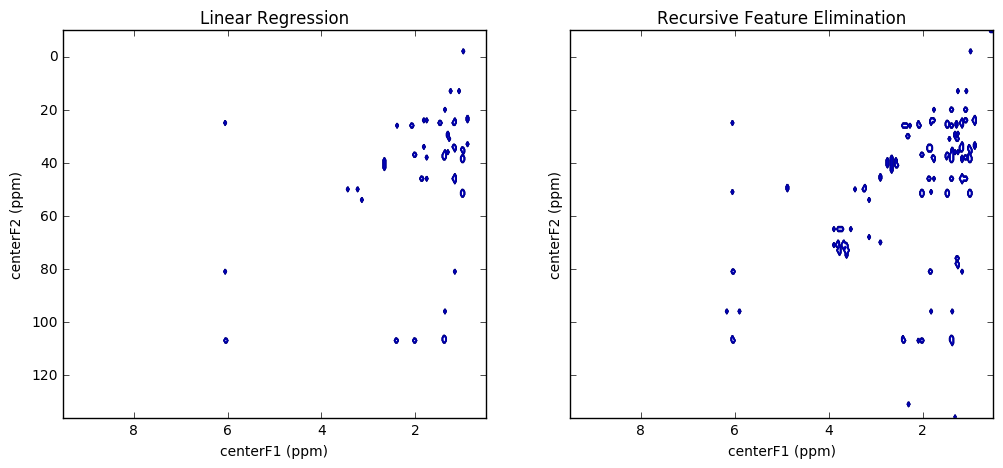

In [35]:
# First Regression
reg.fit(H[:4],Y[:4])   # compute regression on the first 4 spectra only - 5 would be too easy
Threshold = 1E-13
coefmask = (reg.coef_)> Threshold
coef = reg.coef_[coefmask]
tcoefmask = np.where(coefmask.ravel()>0)[0]
N = len(Int[2].ravel())
m = np.zeros(N)
m[tcoefmask] = 1.0
m = m.reshape(Int[2].shape)

# then RFE
NFeatures = 200  # we want a small number
selector = RFE(estimator, step=0.5, n_features_to_select=NFeatures)
selector = selector.fit(H[:4], Y[:4])
mrfe = np.zeros(N)
mrfe[selector.support_] = 1.0
mrfe = mrfe.reshape(Int[2].shape)

f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,5))
ax1.set_title('Linear Regression')
affiche(Int[0], Int[1], m, scale=0.1, ax=ax1)
ax2.set_title('Recursive Feature Elimination')
affiche(Int[0], Int[1], mrfe, scale=0.1, ax=ax2, reverse=False)

to be compared with the HSQC spectrum of artemisinin

In [26]:
# load spike
import sys
sys.path.append('/Users/mad/NPKV2/')
from spike.NPKData import NPKData


          SPIKE
    Version     : 0.9.0
    Date        : 08-09-2016
    Revision Id : 331
*** The wavelet plugin requires the installation of the PyWavelet library ( www.pybytes.com/pywavelets )
*** The zoom3D plugin requires the installation of Mayavi (http://docs.enthought.com/mayavi/mayavi/installation.html)
plugins loaded:
Bruker_NMR_FT,  apmin,  test,  sane,  fastclean,  Peaks,  Fitter copy,  sg,  urQRd,  PALMA,  makebokeh,  Linear_prediction,  Bucketing-Plasmodesma,  wavelet,  Fitter,  zoom3D,  bcorr,  FTMS_calib,  rem_ridge, 
type spike.plugins.report() for a short description


loading 2D


2D data-set
Axis F1 :NMR axis at 176.065935 MHz,  1024 real points,  from -13.363611 ppm (-2352.876615 Hz) to 136.636389 ppm  (24057.013683 Hz)
Axis F2: NMR axis at 700.163292 MHz,  2048 real points,  from -0.814882 ppm (-570.550610 Hz) to 10.171566 ppm  (7121.757082 Hz)
data-set is real

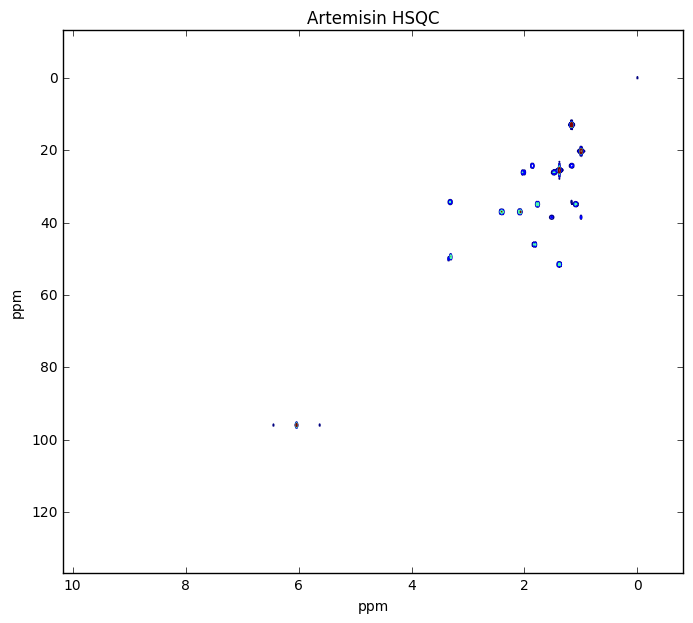

In [27]:
d = NPKData(name='../DATA/ARTE_160816/ARTEref/40/processed.gs2')
d.unit = 'ppm'
fig, ax = plt.subplots(figsize=(8,7))
d.display(scale=4,title='Artemisin HSQC',figure=ax)

and with the HSQC of the sample N°4

loading 2D


2D data-set
Axis F1 :NMR axis at 176.065935 MHz,  1024 real points,  from -13.380459 ppm (-2355.843046 Hz) to 136.619541 ppm  (24054.047252 Hz)
Axis F2: NMR axis at 700.163292 MHz,  2048 real points,  from -0.814122 ppm (-570.018107 Hz) to 10.172326 ppm  (7122.289586 Hz)
data-set is real

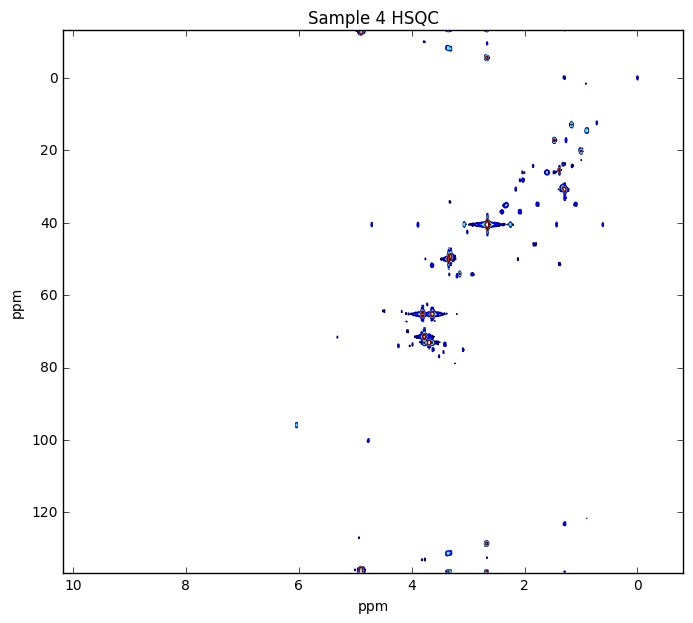

In [28]:
d = NPKData(name='../DATA/ARTE_160816/ARTE4_160816/40/processed.gs2')
d.unit = 'ppm'
fig, ax = plt.subplots(figsize=(8,7))
d.display(scale=25,title='Sample 4 HSQC',figure=ax)

# HMBC
The same analysis can be performed for HBMC experiments

In [29]:
# load data
H = []
for i in range(1,6):
    tit =  op.join(results, r"ARTE{}_160816/2D/hmbcgplpndqf_50_bucketlist.csv".format(i) )
    print (tit)
    Int = loadInt2D(tit, net=True, sym=False)
    tInt = Int[2].ravel() # [tmask]
    H.append(tInt)
H = np.array(H)
print (H.shape)

../DATA/ARTE_160816/Results/ARTE1_160816/2D/hmbcgplpndqf_50_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE2_160816/2D/hmbcgplpndqf_50_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE3_160816/2D/hmbcgplpndqf_50_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE4_160816/2D/hmbcgplpndqf_50_bucketlist.csv
../DATA/ARTE_160816/Results/ARTE5_160816/2D/hmbcgplpndqf_50_bucketlist.csv
(5, 44247)


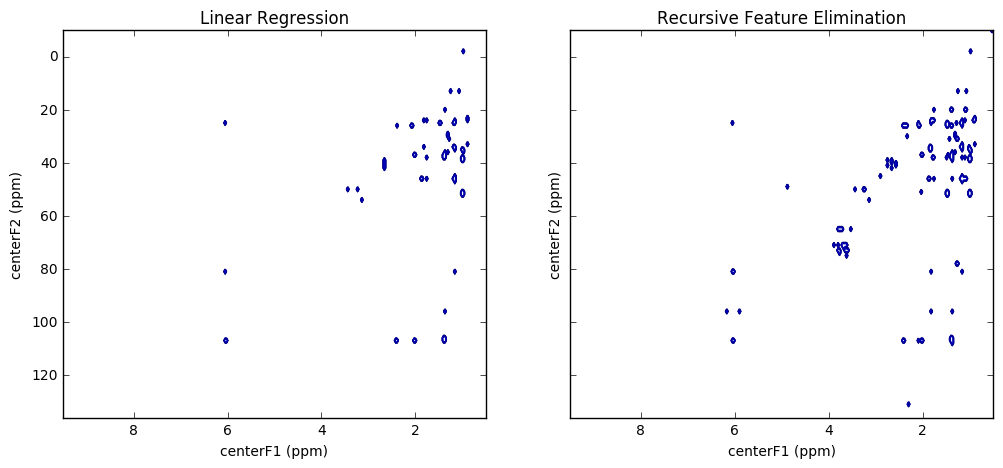

In [30]:
# First Regression
reg.fit(H[:4],Y[:4])   # compute regression on the first 4 spectra only
Threshold = 1E-13
coefmask = (reg.coef_)> Threshold
coef = reg.coef_[coefmask]
tcoefmask = np.where(coefmask.ravel()>0)[0]
N = len(Int[2].ravel())
m = np.zeros(N)
m[tcoefmask] = 1.0
m = m.reshape(Int[2].shape)

# then RFE
NFeatures = 150  # we want a small number
selector = RFE(estimator, step=0.5, n_features_to_select=NFeatures)
selector = selector.fit(H[:4], Y[:4])
mrfe = np.zeros(N)
mrfe[selector.support_] = 1.0
mrfe = mrfe.reshape(Int[2].shape)

f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,5))
ax1.set_title('Linear Regression')
affiche(Int[0], Int[1], m, scale=0.1, ax=ax1)
ax2.set_title('Recursive Feature Elimination')
affiche(Int[0], Int[1], mrfe, scale=0.1, ax=ax2, reverse=False)

to be compared with the HMBC spectrum of artemisinin

loading 2D


2D data-set
Axis F1 :NMR axis at 176.065935 MHz,  1600 real points,  from -13.520789 ppm (-2380.550419 Hz) to 136.479211 ppm  (24029.339879 Hz)
Axis F2: NMR axis at 700.163292 MHz,  4096 real points,  from -0.817402 ppm (-572.315216 Hz) to 10.169046 ppm  (7119.992476 Hz)
data-set is real

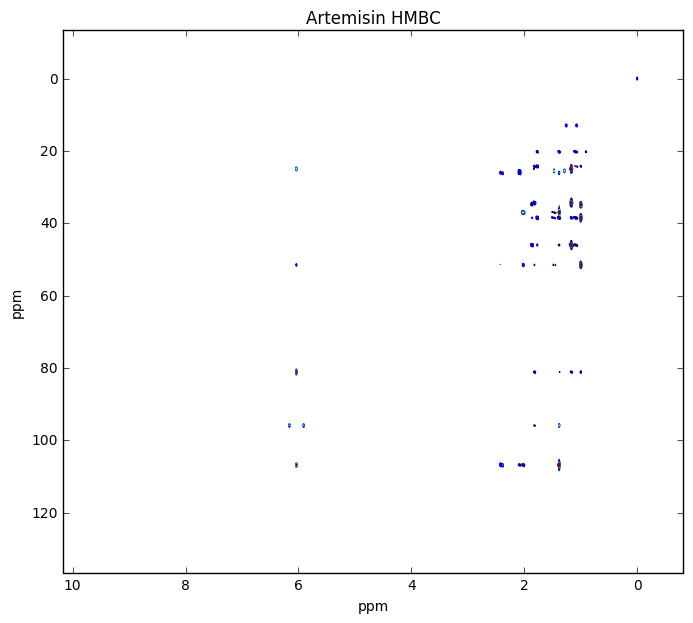

In [31]:
d = NPKData(name='../DATA/ARTE_160816/ARTEref/50/processed.gs2')
d.unit = 'ppm'
fig, ax = plt.subplots(figsize=(8,7))
d.display(scale=4,title='Artemisin HMBC',figure=ax)

and with the HMBC of the sample N°4

loading 2D


2D data-set
Axis F1 :NMR axis at 176.065935 MHz,  1600 real points,  from -13.523712 ppm (-2381.064930 Hz) to 136.476288 ppm  (24028.825369 Hz)
Axis F2: NMR axis at 700.163292 MHz,  4096 real points,  from -0.815635 ppm (-571.077859 Hz) to 10.170813 ppm  (7121.229834 Hz)
data-set is real

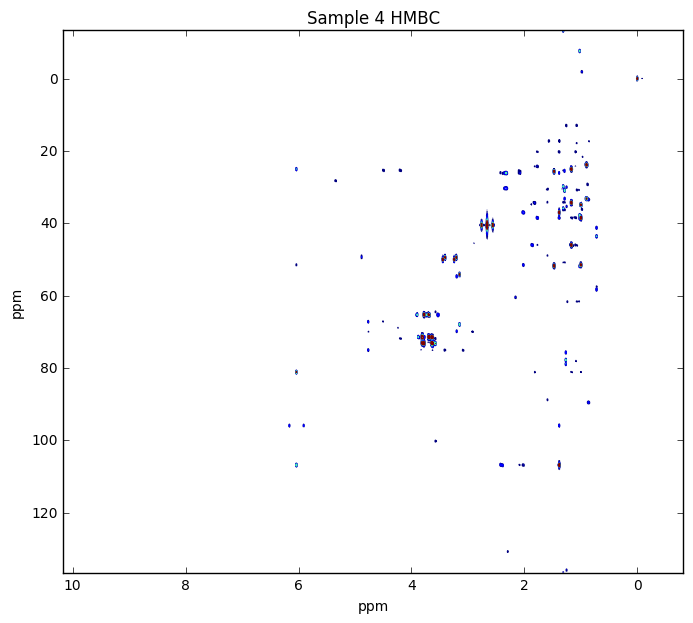

In [32]:
d = NPKData(name='../DATA/ARTE_160816/ARTE4_160816/50/processed.gs2')
d.unit = 'ppm'
fig, ax = plt.subplots(figsize=(8,7))
d.display(scale=25,title='Sample 4 HMBC',figure=ax)

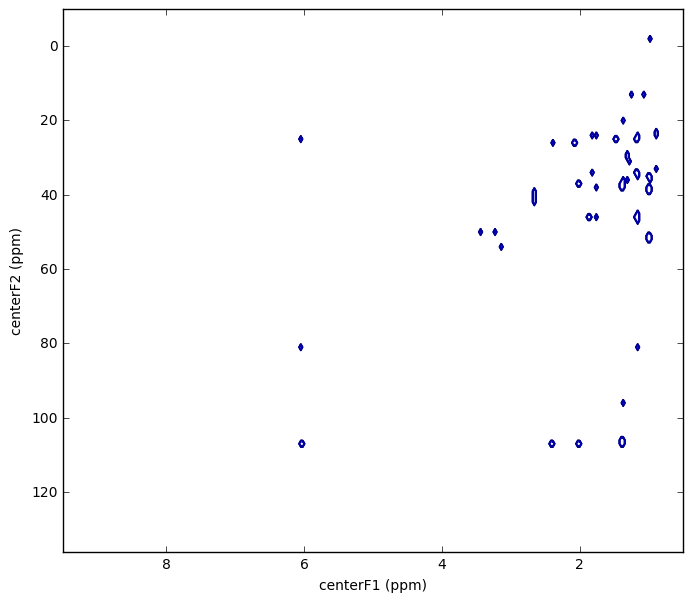

In [33]:
affiche(Int[0], Int[1], m, scale=0.1,)

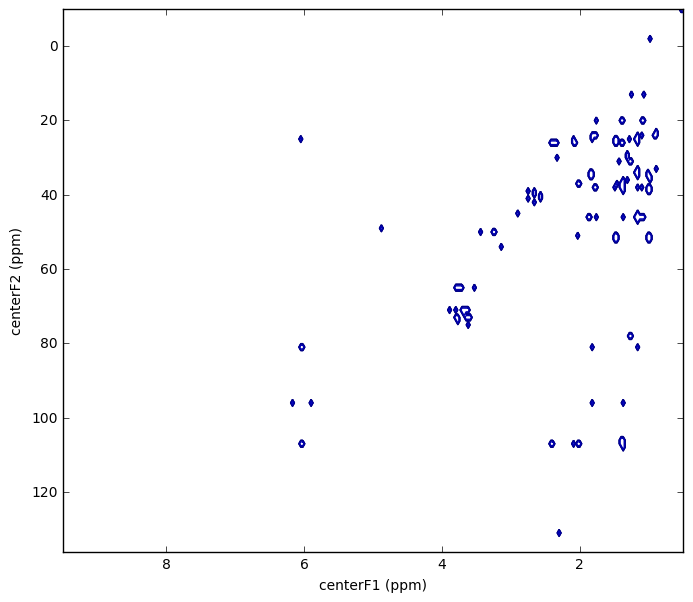

In [34]:
affiche(Int[0], Int[1], mrfe, scale=0.1,)